In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [74]:
data = pd.read_csv("train.csv")
data['SexF'] = (data['Sex'] == 'female').astype(int)
essential_features = ['Pclass', 'SexF', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Survived']
data = data[essential_features]

In [85]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

In [86]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [87]:
def LogisticRegressionModel(w,b,data,LR):
    m = len(data)
    w_gradient = np.zeros(len(w))
    b_gradient = 0
    loss = 0
    for i in range (m):
        x = data.iloc[i].values[:-1]
        y = data.iloc[i].values[-1]
        z = np.dot(w,x) + b
        error = sigmoid(z) - y
        w_gradient += error*x
        b_gradient =+ error
        loss += - (y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)))
    w = w-(1/m)*w_gradient*LR
    b = b - (1/m)*b_gradient*LR
    return (w,b,loss)
print(data)

            0         1         2         3       4         5         6
0    0.826930 -0.776388 -0.516771  0.406367 -0.4833 -0.527889 -0.811200
1   -1.570752  1.288016  0.610286  0.406367 -0.4833  0.841059  1.232741
2    0.826930  1.288016 -0.235007 -0.491999 -0.4833 -0.513458  1.232741
3   -1.570752  1.288016  0.398962  0.406367 -0.4833  0.452324  1.232741
4    0.826930 -0.776388  0.398962 -0.491999 -0.4833 -0.510786 -0.811200
..        ...       ...       ...       ...     ...       ...       ...
572  0.826930 -0.776388 -0.728094 -0.491999 -0.4833 -0.372894 -0.811200
573 -0.371911  1.288016  0.328521 -0.491999 -0.4833 -0.404962  1.232741
574 -1.570752  1.288016  0.680727  0.406367 -0.4833  0.512184  1.232741
575  0.826930  1.288016 -0.798535  0.406367 -0.4833 -0.373785 -0.811200
576  0.826930 -0.776388  0.187639 -0.491999 -0.4833 -0.513458  1.232741

[577 rows x 7 columns]


In [127]:
b = 0
w = np.zeros(len(data.columns) - 1)
LR = 0.001
epochs = 1000
loss_history = []
for i in range (epochs):
    if i%100==0:
        print ("Epochs:",i)
        print ("Loss", loss_history[-1] if loss_history else None)
    w,b,loss = LogisticRegressionModel(w,b,data,LR)
    loss_history.append(loss)
print (w,b)

Epochs: 0
Loss None
Epochs: 100
Loss 375.8589290836301
Epochs: 200
Loss 353.0641542097296
Epochs: 300
Loss 331.69035691889775
Epochs: 400
Loss 311.61970734880515
Epochs: 500
Loss 292.7414784253829
Epochs: 600
Loss 274.95323973058515
Epochs: 700
Loss 258.16125740741603
Epochs: 800
Loss 242.28036744794673
Epochs: 900
Loss 227.2335364280731
[-0.23132367  0.48512799 -0.06700894 -0.05728493  0.05814517  0.1497816 ] 0.0014175208208074604


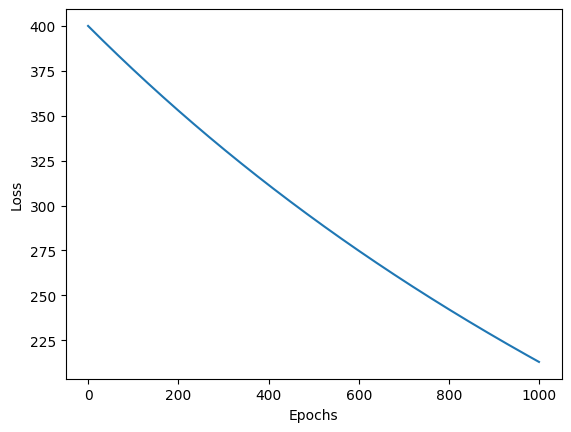

In [128]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [129]:
test_data = pd.read_csv("test.csv")
test_data['SexF'] = (test_data['Sex'] == 'female').astype(int)
test_data = test_data[essential_features[:-1]]

In [130]:
test_data = (test_data - mean[:-1]) / std[:-1]
def predict(w, b, data):
    z = np.dot(data, w) + b
    predictions = sigmoid(z)
    return predictions
test_predictions = predict(w, b, test_data.values)
print("Raw Predictions for Survival:")
print(test_predictions)

Raw Predictions for Survival:
[0.67901369 0.7719002  0.39551414 0.49574226 0.35953818 0.79318937
 0.39499298 0.50450888 0.35256458 0.35256458 0.33803712 0.72686088
 0.32557955 0.61213868 0.40240927 0.35455828 0.66980555 0.31845645
 0.35627692 0.48101011 0.66662121 0.33123595 0.49638283 0.32925883
 0.48606696 0.3315388  0.34388985 0.4986549  0.70580453 0.79040085
 0.67014575 0.35291087 0.59486835 0.35234553 0.33869966 0.71921948
 0.34959413 0.58620988 0.69543577 0.41538898 0.34022436 0.48575868
 0.36574704 0.35349866 0.3595508  0.46010946 0.38177731 0.76411684
 0.34815865 0.35664997 0.43611785 0.32131444 0.49276029 0.47075615
 0.62544439 0.65869112 0.34178583 0.42759183 0.6851939  0.33088392
 0.35457721 0.75649065 0.63314546 0.37755226 0.62263401 0.49801682
 0.35568773 0.46850421 0.35327627 0.59544732 0.35137638 0.6923818
 0.3539222  0.60358777 0.60050073 0.44187003 0.34708913 0.59694686
 0.42077697 0.56526582 0.52830142 0.33285193 0.47117724 0.33724772
 0.34295096 0.4325868  0.41847986

In [179]:
binary_predictions = (test_predictions >= 0.6).astype(int)
print("Binary Predictions for Survival:")
print(binary_predictions)

Binary Predictions for Survival:
[1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0]


In [180]:
test_data = pd.read_csv("test.csv")
matches = np.sum(binary_predictions == test_data['Survived'].values)
misses = len(test_data) - matches

In [181]:
result_df = pd.DataFrame({
    'Predicted Survival': binary_predictions,
    'Actual Survival': test_data['Survived'].values,
    'Hit/Miss': np.where(binary_predictions == test_data['Survived'].values, 'Hit', 'Miss')
})
print(result_df)

print("Number of Matches:", matches)
print("Number of Misses:", misses)
total_samples = len(test_data)
accuracy = matches / total_samples
print("Accuracy:", accuracy*100, "%")


     Predicted Survival  Actual Survival Hit/Miss
0                     1                1      Hit
1                     1                1      Hit
2                     0                0      Hit
3                     0                0      Hit
4                     0                0      Hit
..                  ...              ...      ...
305                   0                0      Hit
306                   1                1      Hit
307                   1                0     Miss
308                   0                1     Miss
309                   0                0      Hit

[310 rows x 3 columns]
Number of Matches: 249
Number of Misses: 61
Accuracy: 80.3225806451613 %
